<a href="https://colab.research.google.com/github/bgreat5/ML/blob/main/Classical%20ML%20Algorithms/Data%20Preprocessing/Data_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing libraries
import pandas as pd
import scipy
import numpy as np

In [ ]:
## load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dataframe = pd.DataFrame(iris.data,columns=iris.feature_names)
dataframe.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
target = pd.DataFrame(iris.target, columns={'Class'})
target.head(2)

,Class
0,0
1,0


**1.Rescaling Dataset**

*What does it mean?*
*   Rescaling data is multiplying each record of the data set by a constant term k, transforming each number x to f(X), where f(x) = kx, and k and x are both real numbers. The range is often set at 0 to 1.
*   Rescaling will change the spread of data as well as the position of data points.
*   Standardize generally means changing the values so that the distribution’s standard deviation equals one. Scaling is often implied.
*   Normalize can be used to mean either of the above things (and more!)

*For what algorithms should Rescaling be used?*

*   useful for optimization algorithms like **Gradient Descent**.
*   useful for algorithms that weight inputs like **linear and logistic regression and neural networks** and algorithms that use distance measures(models that relies on magnitude of values) like **K-Nearest Neighbors**.
*   **support vector machines** with radial bias kernel functions
*   **principal components analysis**
*   **linear discriminant analysis**
*   Algorithms that use L2 regulrization.

*How Rescaling can be performed?*


1.   using the MinMaxScaler class from scikit-learn.
2.   using Normalize method from sklearn (Use only when the feature is represented row wise)
1.   StandardScaler
2.   RobustScaler



*Whats the difference between the two?*

MinMaxScaler is applied column-wise, Normalizer is applied row-wise.

The Normalizer class from Sklearn normalizes samples individually to unit norm. It is not column based but a row-based normalization technique. So, if features are represented by rows, then you should use the Normalizer.






**1.1 MinMaxScaler from Scikit-learn**

MinMaxScaler transforms features by scaling each feature to a given range. It scales and translates each feature individually such that it is in the given range on the training set

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# learning the statistical parameters for each of the features and transforming
rescaledX = scaler.fit_transform(dataframe) #dataframe - X vector

In [ ]:
## Converting array of values to dataframe
rescaledX_df = pd.DataFrame(data = rescaledX,columns = dataframe.columns)
rescaledX_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667


In [ ]:
dataframe['sepal length (cm)'].min(),dataframe['sepal length (cm)'].max()

(4.3, 7.9)

In [ ]:
rescaledX_df['sepal length (cm)'].min(),rescaledX_df['sepal length (cm)'].max()

(0.0, 1.0)

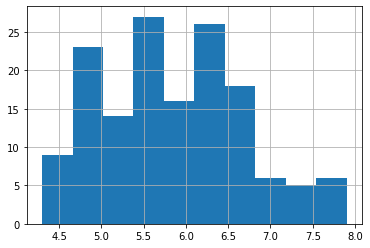

In [ ]:
dataframe['sepal length (cm)'].hist()

MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

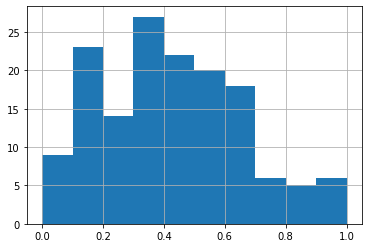

In [ ]:
rescaledX_df['sepal length (cm)'].hist()

**1.2 Normalize() method from Scikit-learn**

Normalizer works on the rows, not the columns.

By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. Unit norm with L2 means that if each element were squared and summed, the total would equal 1

In [ ]:
from sklearn.preprocessing import normalize

normalizedX = normalize(dataframe)
normalized_df = pd.DataFrame(data = normalizedX,columns = dataframe.columns)
normalized_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801


In [ ]:
dataframe['sepal length (cm)'].min(),dataframe['sepal length (cm)'].max()

(4.3, 7.9)

In [ ]:
normalized_df['sepal length (cm)'].min(),normalized_df['sepal length (cm)'].max()

(0.6538774709871312, 0.8609385732675535)

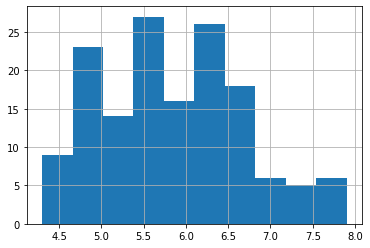

In [ ]:
dataframe['sepal length (cm)'].hist()

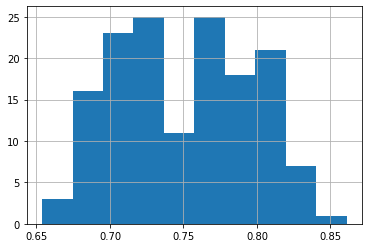

In [ ]:
normalized_df['sepal length (cm)'].hist()

**1.3 StandardScaler() method from Scikit-learn**



StandardScaler() will normalize the features INDIVIDUALLY, so that each feature will have μ = 0 and σ = 1.

x_new = (x_original - mean_of_distribution) / std_of_distribution

It is called Standard Scalar as we are dividing it by the standard deviation of the distribution

Deep learning algorithms often call for zero mean and unit variance. Regression-type algorithms also benefit from normally distributed data with small sample sizes.

In [ ]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
stdscaledX = scaler.fit_transform(dataframe)
stdscaled_df = pd.DataFrame(data = stdscaledX,columns = dataframe.columns)
stdscaled_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444


In [ ]:
stdscaled_df['sepal length (cm)'].min(),stdscaled_df['sepal length (cm)'].max()

(-1.87002413384702, 2.492019202124427)

In [ ]:
stdscaled_df['sepal length (cm)'].mean().round(2)

-0.0

In [ ]:
stdscaled_df['sepal length (cm)'].std()

1.0033500931359767

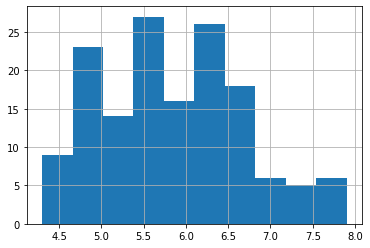

In [ ]:
dataframe['sepal length (cm)'].hist()

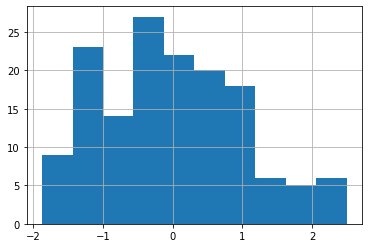

In [ ]:
stdscaled_df['sepal length (cm)'].hist()

**1.4 RobustScaler() method from Scikit-learn**

RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Use RobustScaler if you want to reduce the effects of outliers, relative to MinMaxScaler.

In [ ]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(dataframe)
transformeredX = transformer.transform(dataframe)

In [ ]:
robust_scaled_df = pd.DataFrame(data = transformeredX,columns = dataframe.columns)
robust_scaled_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333


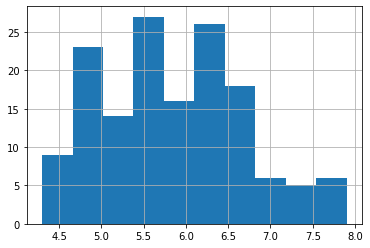

In [ ]:
dataframe['sepal length (cm)'].hist()

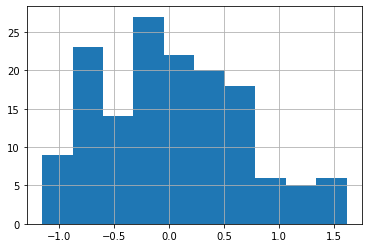

In [ ]:
robust_scaled_df['sepal length (cm)'].hist()

In [ ]:
dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*When to use What- Summary*

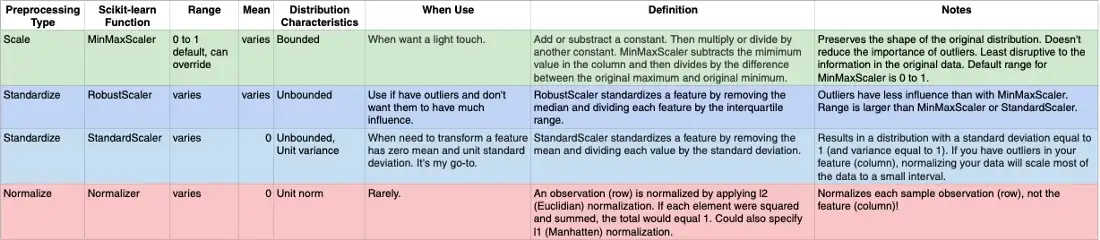